In [1]:
# Importing required libraries
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import tensorflow as tf
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from wordcloud import WordCloud

In [2]:
# Download NLTK resources
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to C:\Users\Tushti
[nltk_data]     Savarn\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Tushti
[nltk_data]     Savarn\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
# Load data
df = pd.read_csv('Suicide_Detection.csv')

In [4]:
df


,Unnamed: 0,text,class
0,2,Ex Wife Threatening SuicideRecently I left my ...,suicide
1,3,Am I weird I don't get affected by compliments...,non-suicide
2,4,Finally 2020 is almost over... So I can never ...,non-suicide
3,8,i need helpjust help me im crying so hard,suicide
4,9,"I’m so lostHello, my name is Adam (16) and I’v...",suicide
...,...,...,...
232069,348103,If you don't like rock then your not going to ...,non-suicide
232070,348106,You how you can tell i have so many friends an...,non-suicide
232071,348107,pee probably tastes like salty tea😏💦‼️ can som...,non-suicide
232072,348108,The usual stuff you find hereI'm not posting t...,suicide


In [5]:
df.isnull()

,Unnamed: 0,text,class
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
232069,False,False,False
232070,False,False,False
232071,False,False,False
232072,False,False,False


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232074 entries, 0 to 232073
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  232074 non-null  int64 
 1   text        232074 non-null  object
 2   class       232074 non-null  object
dtypes: int64(1), object(2)
memory usage: 5.3+ MB


In [7]:
# Drop the first column as it is not required
df = df.drop(df.columns[0], axis=1)

# Print the DataFrame
print(df)

                                                     text        class
0       Ex Wife Threatening SuicideRecently I left my ...      suicide
1       Am I weird I don't get affected by compliments...  non-suicide
2       Finally 2020 is almost over... So I can never ...  non-suicide
3               i need helpjust help me im crying so hard      suicide
4       I’m so lostHello, my name is Adam (16) and I’v...      suicide
...                                                   ...          ...
232069  If you don't like rock then your not going to ...  non-suicide
232070  You how you can tell i have so many friends an...  non-suicide
232071  pee probably tastes like salty tea😏💦‼️ can som...  non-suicide
232072  The usual stuff you find hereI'm not posting t...      suicide
232073  I still haven't beaten the first boss in Hollo...  non-suicide

[232074 rows x 2 columns]


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232074 entries, 0 to 232073
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text    232074 non-null  object
 1   class   232074 non-null  object
dtypes: object(2)
memory usage: 3.5+ MB


In [9]:
## shows there are no null objects

In [10]:
df['class'].value_counts().index.values

array(['suicide', 'non-suicide'], dtype=object)

In [11]:
# Data cleaning and preprocessing
def clean_text(text):
    # Remove HTML tags
    text = re.sub('<[^<]+?>', '', text)
    # Remove special characters and emojis
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    # Convert to lowercase
    text = text.lower()
    return text

In [12]:
df['clean_text'] = df['text'].apply(clean_text)

In [13]:
df['clean_text']

0         ex wife threatening suiciderecently i left my ...
1         am i weird i dont get affected by compliments ...
2         finally 2020 is almost over so i can never hea...
3                 i need helpjust help me im crying so hard
4         im so losthello my name is adam 16 and ive bee...
                                ...                        
232069    if you dont like rock then your not going to g...
232070    you how you can tell i have so many friends an...
232071    pee probably tastes like salty tea can someone...
232072    the usual stuff you find hereim not posting th...
232073    i still havent beaten the first boss in hollow...
Name: clean_text, Length: 232074, dtype: object

In [14]:
# Tokenization
df['tokenize_text'] = df['clean_text'].apply(word_tokenize)

In [15]:
df['tokenize_text']


0         [ex, wife, threatening, suiciderecently, i, le...
1         [am, i, weird, i, dont, get, affected, by, com...
2         [finally, 2020, is, almost, over, so, i, can, ...
3         [i, need, helpjust, help, me, im, crying, so, ...
4         [im, so, losthello, my, name, is, adam, 16, an...
                                ...                        
232069    [if, you, dont, like, rock, then, your, not, g...
232070    [you, how, you, can, tell, i, have, so, many, ...
232071    [pee, probably, tastes, like, salty, tea, can,...
232072    [the, usual, stuff, you, find, hereim, not, po...
232073    [i, still, havent, beaten, the, first, boss, i...
Name: tokenize_text, Length: 232074, dtype: object

In [16]:
# Remove stopwords
stop_words = set(stopwords.words('english'))
df['filtered_text'] = df['tokenize_text'].apply(lambda x: [word for word in x if word not in stop_words])

In [17]:
df['filtered_text']

0         [ex, wife, threatening, suiciderecently, left,...
1         [weird, dont, get, affected, compliments, comi...
2         [finally, 2020, almost, never, hear, 2020, bad...
3                  [need, helpjust, help, im, crying, hard]
4         [im, losthello, name, adam, 16, ive, strugglin...
                                ...                        
232069    [dont, like, rock, going, get, anything, go, h...
232070    [tell, many, friends, lonely, everything, depr...
232071    [pee, probably, tastes, like, salty, tea, some...
232072    [usual, stuff, find, hereim, posting, sympathy...
232073    [still, havent, beaten, first, boss, hollow, k...
Name: filtered_text, Length: 232074, dtype: object

In [18]:
# Stemming
stemmer = PorterStemmer()
df['stem_text'] = df['filtered_text'].apply(lambda x: [stemmer.stem(word) for word in x])

In [19]:
df['stem_text']

0         [ex, wife, threaten, suiciderec, left, wife, g...
1         [weird, dont, get, affect, compliment, come, s...
2         [final, 2020, almost, never, hear, 2020, bad, ...
3                     [need, helpjust, help, im, cri, hard]
4         [im, losthello, name, adam, 16, ive, struggl, ...
                                ...                        
232069    [dont, like, rock, go, get, anyth, go, httpsmu...
232070    [tell, mani, friend, lone, everyth, depriv, pr...
232071    [pee, probabl, tast, like, salti, tea, someon,...
232072    [usual, stuff, find, hereim, post, sympathi, p...
232073    [still, havent, beaten, first, boss, hollow, k...
Name: stem_text, Length: 232074, dtype: object

In [20]:
# Lemmatization
lemmatizer = WordNetLemmatizer()
df['lemma_text'] = df['stem_text'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])

In [21]:
df['lemma_text']

0         [ex, wife, threaten, suiciderec, left, wife, g...
1         [weird, dont, get, affect, compliment, come, s...
2         [final, 2020, almost, never, hear, 2020, bad, ...
3                     [need, helpjust, help, im, cri, hard]
4         [im, losthello, name, adam, 16, ive, struggl, ...
                                ...                        
232069    [dont, like, rock, go, get, anyth, go, httpsmu...
232070    [tell, mani, friend, lone, everyth, depriv, pr...
232071    [pee, probabl, tast, like, salti, tea, someon,...
232072    [usual, stuff, find, hereim, post, sympathi, p...
232073    [still, havent, beaten, first, bos, hollow, kn...
Name: lemma_text, Length: 232074, dtype: object

In [22]:
# Combine preprocessed words back into a single string
df['lemma_text'] = df['lemma_text'].apply(lambda x: ' '.join(x))

In [23]:
# Map class to binary values
df['class'] = df['class'].map({'suicide': 1, 'non-suicide': 0})

In [24]:
df['class']

0         1
1         0
2         0
3         1
4         1
         ..
232069    0
232070    0
232071    0
232072    1
232073    0
Name: class, Length: 232074, dtype: int64

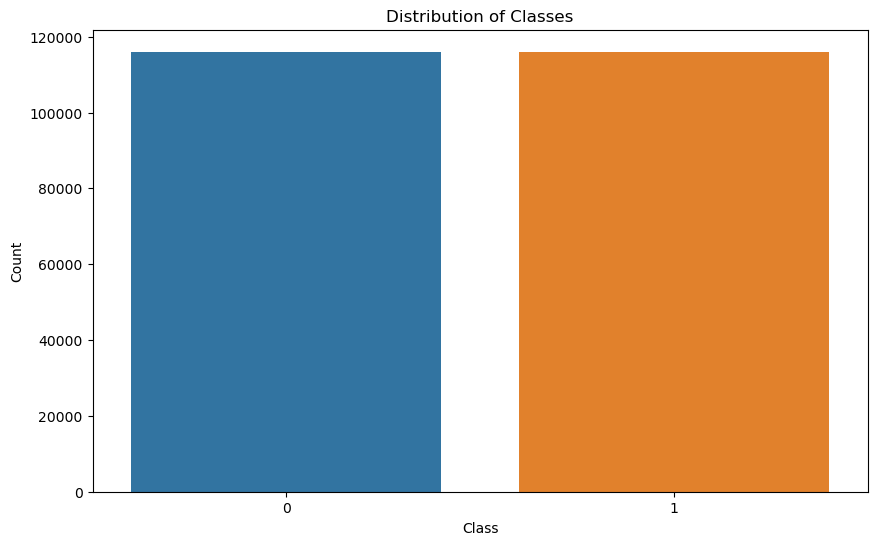

In [25]:
# Data visualization
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='class')
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Distribution of Classes')
plt.show()

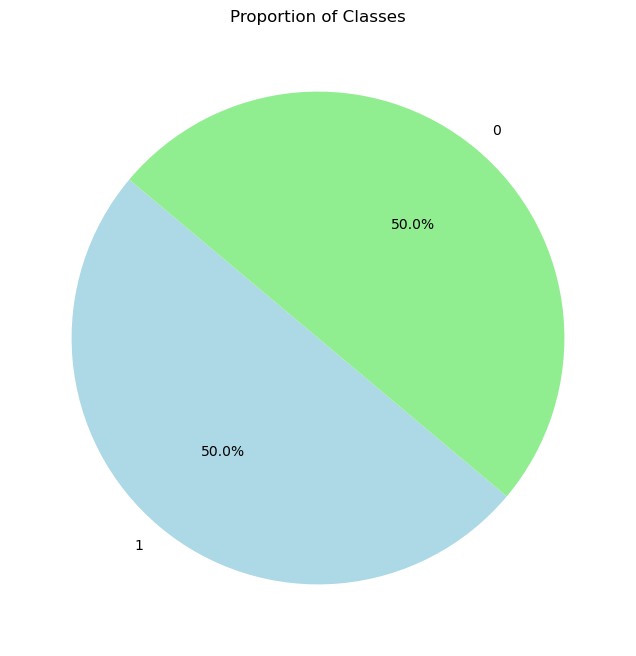

In [26]:
plt.figure(figsize=(8, 8))
df['class'].value_counts().plot.pie(autopct='%1.1f%%', startangle=140, colors=['lightblue', 'lightgreen'])
plt.title('Proportion of Classes')
plt.ylabel('')
plt.show()

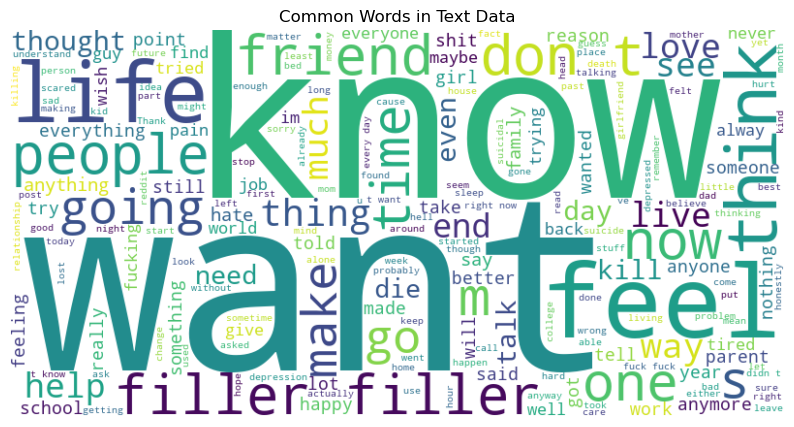

In [27]:
# Combine all text data into one string for word cloud visualization
text = ' '.join(df['text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Common Words in Text Data')
plt.show()

In [28]:
X = df['lemma_text'].astype(str)  # Ensure all elements are strings
y = df['class']
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [29]:
X_train

103752    go kill sooni dont know know bodi mind complet...
208014    use sub diari day 68 today great school stuff ...
220765    el suppos doiv got seriou problem year back be...
116840    hey ye need help get new subreddit ground subr...
149067    non tran gender dysphoria like menstruat exist...
                                ...                        
119879    found combo steve minecraft forgot save vault ...
103694    much hate admit california texa quit similar l...
131932        mani peopl onlin 20000 horni mf time what guy
146867    fuck chemistri man got ta studi thing noth wan...
121958    put rees wrapper ground pocket thing like conv...
Name: lemma_text, Length: 185659, dtype: object

In [30]:
print(type(X_train))

<class 'pandas.core.series.Series'>


In [31]:
X_test

74414     dont know7 month self harm free urg get strong...
149516    start becom rich start compani becom 16 afford...
12484     poem haiku umegamedev hi hello hello stop fuck...
14043     ive honestli got idea anymoreit feel everyon f...
30673     ever cri like think unfair life cri cant cri e...
                                ...                        
7259      wish reason die like cancer illnessinstead im ...
4207      want friend final leavei want abl die without ...
92900         guess got headpat cute girl yup one time ladi
17403     program usual god im good im almost profession...
4230      hit meiv think lot late realli get better moth...
Name: lemma_text, Length: 46415, dtype: object

In [32]:
y_train

103752    1
208014    0
220765    1
116840    0
149067    0
         ..
119879    0
103694    0
131932    0
146867    0
121958    0
Name: class, Length: 185659, dtype: int64

In [33]:
y_test

74414     1
149516    0
12484     0
14043     1
30673     0
         ..
7259      1
4207      1
92900     0
17403     0
4230      1
Name: class, Length: 46415, dtype: int64

In [34]:
# Transform text data using TF-IDF
tfidf = TfidfVectorizer()
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [35]:
# Save the TF-IDF vectorizer
with open('tfidf_vectorizer.pkl', 'wb') as f:
    pickle.dump(tfidf, f)

In [36]:
# Convert target labels to one-hot encoded format
#Y_train = to_categorical(Y_train)
#Y_test = to_categorical(Y_test)

In [37]:
# Convert target labels to binary (0 or 1)
#Y_train_binary = Y_train
#Y_test_binary = Y_test

In [38]:
# Build the model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_tfidf.shape[1],)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(32, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Single output for binary classification
])

C:\Users\Tushti Savarn\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [39]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [40]:
# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [41]:
# Train the model and save the history
history = model.fit(X_train_tfidf, y_train, epochs=50, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/50
4642/4642 ━━━━━━━━━━━━━━━━━━━━ 955s 205ms/step - accuracy: 0.8787 - loss: 0.2972 - val_accuracy: 0.9377 - val_loss: 0.1661
Epoch 2/50
4642/4642 ━━━━━━━━━━━━━━━━━━━━ 934s 201ms/step - accuracy: 0.9389 - loss: 0.1685 - val_accuracy: 0.9396 - val_loss: 0.1558
Epoch 3/50
4642/4642 ━━━━━━━━━━━━━━━━━━━━ 942s 203ms/step - accuracy: 0.9539 - loss: 0.1329 - val_accuracy: 0.9393 - val_loss: 0.1590
Epoch 4/50
4642/4642 ━━━━━━━━━━━━━━━━━━━━ 929s 200ms/step - accuracy: 0.9636 - loss: 0.1076 - val_accuracy: 0.9419 - val_loss: 0.1582
Epoch 5/50
4642/4642 ━━━━━━━━━━━━━━━━━━━━ 902s 194ms/step - accuracy: 0.9695 - loss: 0.0917 - val_accuracy: 0.9399 - val_loss: 0.1716
Epoch 6/50
4642/4642 ━━━━━━━━━━━━━━━━━━━━ 916s 197ms/step - accuracy: 0.9732 - loss: 0.0816 - val_accuracy: 0.9398 - val_loss: 0.1803
Epoch 7/50
4642/4642 ━━━━━━━━━━━━━━━━━━━━ 941s 203ms/step - accuracy: 0.9765 - loss: 0.0736 - val_accuracy: 0.9436 - val_loss: 0.1766


In [42]:
# Save the trained model
model.save('sentiment_model.h5')

In [43]:
# Save the training history
with open('training_history.pkl', 'wb') as file:
    pickle.dump(history.history, file)

print("Model training and saving completed successfully!")

Model training and saving completed successfully!


In [44]:
# Visualize accuracy and loss
history_dict = history.history

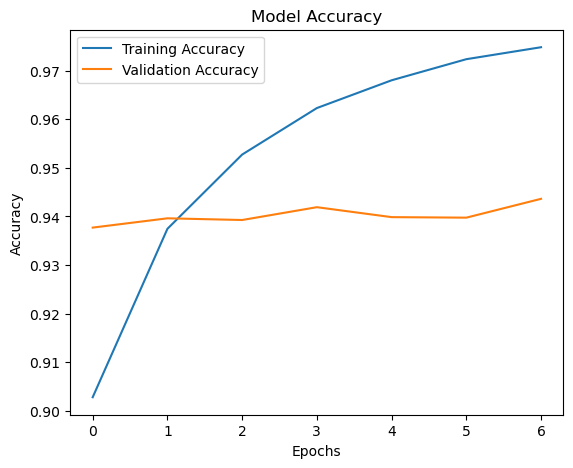

In [45]:
# Plot training & validation accuracy values
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history_dict['accuracy'], label='Training Accuracy')
plt.plot(history_dict['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')

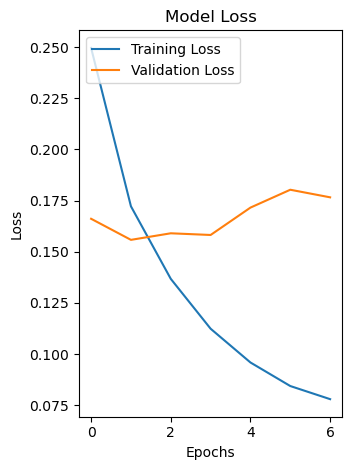

In [46]:
# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history_dict['loss'], label='Training Loss')
plt.plot(history_dict['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()